Intro

## Library Dependencies

This project relies on several key Python libraries for data collection, modeling, and analysis. **pybaseball** is used to download comprehensive baseball statistics from publicly available sources, providing access to player batting data across multiple seasons. **scikit-learn** serves as the primary machine learning framework, enabling us to build and evaluate predictive models including linear regression and random forest algorithms for batting average prediction. Finally, **statsmodels** is employed for advanced statistical modeling, specifically implementing mixed effects linear models that account for player-level random effects when predicting BABIP (Batting Average on Balls In Play). These libraries work alongside standard data science tools (pandas, numpy, matplotlib) to facilitate the complete workflow from data acquisition to model evaluation.

In [91]:
# Install libraries
!pip install pybaseball
!pip install -U scikit-learn
import sys
print(sys.executable)
!pip show statsmodels
!pip install plotly




[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
/Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/bin/python
Name: statsmodels
Version: 0.14.5
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/lib/python3.13/site-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: 
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 17.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
from pybaseball import batting_stats
import pandas as pd

# Define the seasons you want
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Download and combine data for all years
dfs = []
for year in years:
    df_year = batting_stats(year, qual=100)
    df_year["season"] = year
    dfs.append(df_year)

# Combine into one DataFrame
df_all = pd.concat(dfs, ignore_index=True)

# Preview and save
print(df_all.shape)
print(df_all.head())

(4375, 321)
    IDfg  Season              Name Team  Age    G   AB   PA    H   1B  ...  \
0  11579    2015      Bryce Harper  WSN   22  153  521  654  172   91  ...   
1  10155    2015        Mike Trout  LAA   23  159  575  682  172   93  ...   
2   5038    2015    Josh Donaldson  TOR   29  158  620  711  184  100  ...   
3   4314    2015        Joey Votto  CIN   31  158  545  695  171  107  ...   
4   9218    2015  Paul Goldschmidt  ARI   27  159  567  695  182  109  ...   

   HardHit  HardHit%  Events  CStr%   CSW%    xBA   xSLG  xwOBA  L-WAR  season  
0      188     0.477     394  0.118  0.226  0.293  0.543  0.418    9.3    2015  
1      205     0.486     422  0.207  0.282  0.297  0.588  0.422    9.3    2015  
2      233     0.467     499  0.145  0.255  0.279  0.542  0.388    8.7    2015  
3      175     0.425     412  0.177  0.254  0.289  0.542  0.423    7.3    2015  
4      197     0.465     424  0.181  0.266  0.279  0.558  0.403    7.2    2015  

[5 rows x 321 columns]


Kept 25 columns. Missing: none
(4375, 25)
      id              name team  season   pa    avg  babip  bb_rate  k_rate  \
0  11579      Bryce Harper  WSN    2015  654  0.330  0.369    0.190   0.200   
1  10155        Mike Trout  LAA    2015  682  0.299  0.344    0.135   0.232   
2   5038    Josh Donaldson  TOR    2015  711  0.297  0.314    0.103   0.187   
3   4314        Joey Votto  CIN    2015  695  0.314  0.371    0.206   0.194   
4   9218  Paul Goldschmidt  ARI    2015  695  0.321  0.382    0.170   0.217   

   sprint_speed  ...  zcontact  contact     ld     gb     fb   iffb  hr_fb  \
0           3.1  ...     0.844    0.754  0.222  0.385  0.393  0.058  0.273   
1           5.0  ...     0.877    0.800  0.244  0.372  0.384  0.025  0.253   
2           4.5  ...     0.828    0.760  0.173  0.448  0.379  0.096  0.218   
3           3.7  ...     0.825    0.791  0.250  0.422  0.328  0.015  0.216   
4           4.6  ...     0.825    0.777  0.234  0.416  0.350  0.054  0.223   

    pull   opp

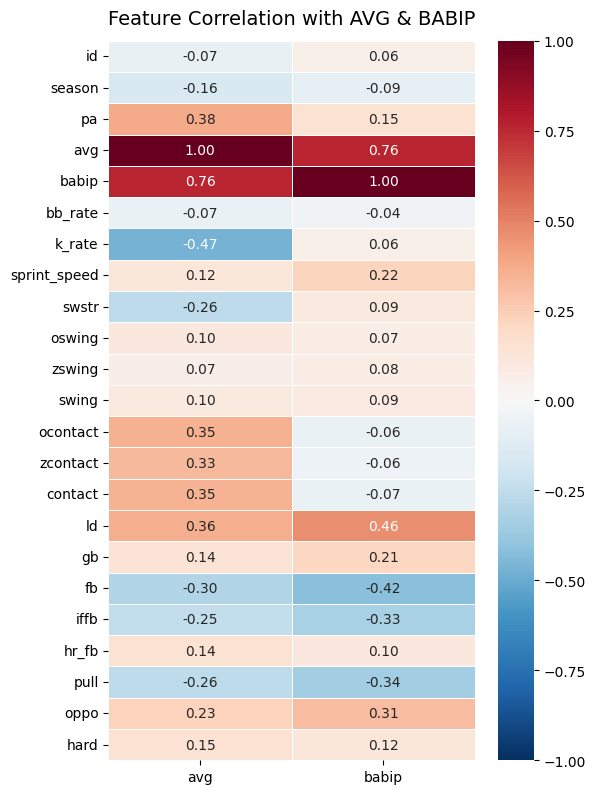


Top 10 correlated features with AVG:
avg         1.000000
babip       0.764403
pa          0.378146
ld          0.362976
ocontact    0.354882
contact     0.348364
zcontact    0.325951
oppo        0.227152
hard        0.150667
hr_fb       0.143744
Name: avg, dtype: float64

Top 10 correlated features with BABIP:
babip           1.000000
avg             0.764403
ld              0.462252
oppo            0.310882
sprint_speed    0.223371
gb              0.211896
pa              0.154171
hard            0.122089
hr_fb           0.102365
swstr           0.094952
Name: babip, dtype: float64


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# columns we want to consider
cols = [
    'IDfg','Name','Team','Season','PA','AVG','BABIP','BB%','K%','Spd',
    'SwStr%','O-Swing%','Z-Swing%','Swing%','O-Contact%','Z-Contact%','Contact%',
    'LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Oppo%','Hard%'
]

# keep only the intersection
available = [c for c in cols if c in df_all.columns]
missing = [c for c in cols if c not in df_all.columns]

df_focus = df_all[available].copy()
print(f"Kept {len(available)} columns. Missing: {missing if missing else 'none'}")

# standardize column names to snake_case
rename_map = {
    'IDfg': 'id', 'Name': 'name', 'Team': 'team', 'Season': 'season', 'PA': 'pa',
    'AVG': 'avg', 'BABIP': 'babip', 'BB%': 'bb_rate', 'K%': 'k_rate', 'Spd': 'sprint_speed',
    'SwStr%': 'swstr', 'O-Swing%': 'oswing', 'Z-Swing%': 'zswing', 'Swing%': 'swing',
    'O-Contact%': 'ocontact', 'Z-Contact%': 'zcontact', 'Contact%': 'contact',
    'LD%': 'ld', 'GB%': 'gb', 'FB%': 'fb', 'IFFB%': 'iffb', 'HR/FB': 'hr_fb',
    'Pull%': 'pull', 'Oppo%': 'oppo', 'Hard%': 'hard'
}
df_focus.rename(columns=rename_map, inplace=True)

# Preview and save
print(df_focus.shape)
print(df_focus.head())

# filter to meaningful seasons
MIN_PA = 200
df_corr = df_focus[df_focus['pa'] >= MIN_PA].copy()

# select numeric columns (ignore id/name/team)
num_cols = df_corr.select_dtypes(include=[np.number]).columns.tolist()

# compute correlation matrix
corr = df_corr[num_cols].corr()

# extract only features vs AVG and BABIP
targets = ['avg', 'babip']
corr_targets = corr[targets].copy()

# plot
plt.figure(figsize=(6, max(4, 0.35 * len(corr_targets))))
sns.heatmap(corr_targets, cmap='RdBu_r', center=0, vmin=-1, vmax=1,
            linewidths=0.5, annot=True, fmt=".2f")
plt.title("Feature Correlation with AVG & BABIP", fontsize=14, pad=12)
plt.tight_layout()
plt.show()

# optional: quick sorted correlations to inspect top signals
print("\nTop 10 correlated features with AVG:")
print(corr_targets['avg'].sort_values(ascending=False).head(10))
print("\nTop 10 correlated features with BABIP:")
print(corr_targets['babip'].sort_values(ascending=False).head(10))

### Data Cleaning and Processing

Before building predictive models, it's essential to clean and preprocess our data. This section covers key steps required to prepare our dataset for machine learning, including handling missing values, removing duplicates, encoding categorical variables, dealing with outliers, and ensuring data type consistency.

### Step 1: Setup and Exploratory Data Analysis

First, we'll import the necessary libraries and examine the initial state of our dataset. This helps us understand the data structure, identify missing values, and get a sense of what cleaning steps will be needed.


In [4]:
import pandas as pd
import numpy as np

# Start with the focused dataset
df_clean = df_focus.copy()
print(f"Starting: {df_clean.shape}")

# 1. EXPLORATORY DATA ANALYSIS
print("\n1. Data Info:")
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Data types: {df_clean.dtypes.value_counts().to_dict()}")


Starting: (4375, 25)

1. Data Info:
Shape: (4375, 25)
Missing values: 0
Data types: {dtype('float64'): 20, dtype('int64'): 3, dtype('O'): 2}


### Step 2: Remove Columns with Excessive Missing Data

Columns with more than 50% missing values are typically not useful for modeling and can introduce noise. We'll identify and remove these columns to keep our dataset clean and focused on features with sufficient data.


In [5]:
# 2. REMOVE COLUMNS WITH LOTS OF MISSING DATA (>50%)
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100
cols_to_drop = missing_pct[missing_pct > 50].index.tolist()
if cols_to_drop:
    df_clean = df_clean.drop(columns=cols_to_drop)
    print(f"\n2. Removed {len(cols_to_drop)} columns with >50% missing data")
else:
    print(f"\n2. No columns with >50% missing data (0 columns removed)")



2. No columns with >50% missing data (0 columns removed)


### Step 3: Remove Duplicate Player-Season Combinations

Sometimes the same player-season combination may appear multiple times in the dataset (e.g., if a player was traded mid-season). We'll keep only the record with the highest plate appearances (PA) for each player-season combination, as this likely represents the most complete data.


In [6]:
# 3. REMOVE DUPLICATE PLAYERS (keep highest PA)
duplicates_before = df_clean.duplicated(subset=['name', 'season']).sum()
df_clean = df_clean.sort_values('pa', ascending=False).drop_duplicates(subset=['name', 'season'], keep='first')
print(f"\n3. Removed {duplicates_before} duplicate player-season combinations")



3. Removed 0 duplicate player-season combinations


### Step 4: Handle Text/Categorical Data

Machine learning models require numerical inputs. We need to convert categorical text data (like team names and player names) into numerical format. For team names, we'll create dummy variables (one-hot encoding). For player names, we'll create a numeric player ID that preserves the identity of each player.


In [7]:
# 4. HANDLE TEXT DATA
# Convert team to dummy variables
if 'team' in df_clean.columns:
    team_dummies = pd.get_dummies(df_clean['team'], prefix='team')
    df_clean = pd.concat([df_clean, team_dummies], axis=1).drop(columns=['team'])

# Convert name to numeric ID (simple approach without sklearn)
if 'name' in df_clean.columns:
    unique_names = df_clean['name'].unique()
    name_to_id = {name: idx for idx, name in enumerate(unique_names)}
    df_clean['player_id'] = df_clean['name'].map(name_to_id)
    df_clean = df_clean.drop(columns=['name'])

print(f"\n4. Handled text data: {df_clean.shape}")



4. Handled text data: (4375, 55)


### Step 5: Convert Data Types

Ensuring consistent data types is important for model performance and memory efficiency. We'll convert ID columns to integers and ensure all numeric columns are properly formatted as numeric types. This also helps catch any data quality issues.


In [8]:
# 5. CONVERT DATA TYPES
for col in df_clean.columns:
    if col in ['id', 'season', 'player_id']:
        df_clean[col] = df_clean[col].astype('int32')
    else:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')


### Step 6: Remove Outliers

Extreme outliers can significantly impact model performance and may represent data errors or exceptional cases that don't reflect typical player performance. We'll use the Interquartile Range (IQR) method with a conservative 3×IQR threshold to identify and remove outliers from key statistical columns.


In [9]:
# 6. REMOVE OUTLIERS (conservative 3*IQR rule)
# Source: https://online.stat.psu.edu/stat200/lesson/3/3.2
key_cols = ['avg', 'babip', 'pa', 'bb_rate', 'k_rate', 'sprint_speed']
initial_rows = len(df_clean)

for col in key_cols:
    if col in df_clean.columns:
        Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        bounds = (Q1 - 3*IQR, Q3 + 3*IQR)
        df_clean = df_clean[(df_clean[col] >= bounds[0]) & (df_clean[col] <= bounds[1])]

print(f"\n5-6. Removed {initial_rows - len(df_clean)} outliers, converted data types")



5-6. Removed 1 outliers, converted data types


### Step 7: Final Cleanup and Save

As a final step, we'll fill any remaining missing values with the median value of each column (a robust approach that isn't affected by outliers). Then we'll save the cleaned dataset to a CSV file for use in model training.


In [10]:
# 7. FINAL CLEANUP
# Fill remaining missing values
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

print(f"\n7. Final dataset: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")

# Save cleaned data
df_clean.to_csv("cleaned_batting_data.csv", index=False)
print(f"\nCleaned data saved to: cleaned_batting_data.csv")
print("DATA CLEANING COMPLETE!")



7. Final dataset: (4374, 55)
Missing values: 0

Cleaned data saved to: cleaned_batting_data.csv
DATA CLEANING COMPLETE!


In [11]:
# Bell Train/Test Splitting
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
import pandas as pd
from sklearn.model_selection import train_test_split

# Load proccessed data
df = pd.read_csv('cleaned_batting_data.csv')

# Set X and Y
X = df.drop(columns=['avg'])
Y = df["avg"]

# Split traning and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Save datasets as csv
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
Y_train.to_csv('Y_train.csv', index=False)
Y_test.to_csv('Y_test.csv', index=False)

## Linear Regression Model for Batting Average (AVG)

We'll build a baseline linear regression model to predict batting average. This model will help us understand which features are most important for predicting AVG and establish a performance baseline for comparison with more complex models.


### Step 1: Load and Prepare Data

First, we'll load the training and test datasets and ensure the target variable (batting average) is properly formatted. We'll also handle any missing values to ensure clean data for model training.


In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load data
X_train = pd.read_csv("X_train.csv")
X_test  = pd.read_csv("X_test.csv")
Y_train = pd.read_csv("Y_train.csv").squeeze("columns")
Y_test  = pd.read_csv("Y_test.csv").squeeze("columns")

# Defensive: ensure target is numeric
Y_train = pd.to_numeric(Y_train, errors="coerce")
Y_test  = pd.to_numeric(Y_test, errors="coerce")

# Drop any rows with missing targets (should be none)
mask_tr = ~Y_train.isna()
mask_te = ~Y_test.isna()
X_train_lr = X_train.loc[mask_tr].copy()
Y_train_lr = Y_train.loc[mask_tr].copy()
X_test_lr  = X_test.loc[mask_te].copy()
Y_test_lr  = Y_test.loc[mask_te].copy()

print("STEP 3: LINEAR REGRESSION (AVG)")
print("=" * 40)
print(f"Train: X={X_train_lr.shape}  Y={Y_train_lr.shape}")
print(f"Test:  X={X_test_lr.shape}   Y={Y_test_lr.shape}")


STEP 3: LINEAR REGRESSION (AVG)
Train: X=(3499, 54)  Y=(3499,)
Test:  X=(875, 54)   Y=(875,)


### Step 2: Train the Model

We'll fit a linear regression model using scikit-learn's `LinearRegression`. This model will learn the linear relationship between our features and batting average.


In [13]:
# Fit model
lin = LinearRegression()
lin.fit(X_train_lr, Y_train_lr)
print("Model training complete!")


Model training complete!


### Step 3: Evaluate Model Performance

We'll evaluate the model using multiple metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score. These metrics help us understand how well the model performs on both training and test data.


In [14]:
# Make predictions
train_pred = lin.predict(X_train_lr)
test_pred  = lin.predict(X_test_lr)

# Calculate metrics
mae_tr = mean_absolute_error(Y_train_lr, train_pred)
mse_tr = mean_squared_error(Y_train_lr, train_pred)
rmse_tr = np.sqrt(mse_tr)
r2_tr = r2_score(Y_train_lr, train_pred)

mae_te = mean_absolute_error(Y_test_lr, test_pred)
mse_te = mean_squared_error(Y_test_lr, test_pred)
rmse_te = np.sqrt(mse_te)
r2_te = r2_score(Y_test_lr, test_pred)

print("\nPerformance:")
print(f"Train -> MAE: {mae_tr:.4f} | RMSE: {rmse_tr:.4f} | R2: {r2_tr:.4f}")
print(f"Test  -> MAE: {mae_te:.4f} | RMSE: {rmse_te:.4f} | R2: {r2_te:.4f}")



Performance:
Train -> MAE: 0.0035 | RMSE: 0.0050 | R2: 0.9814
Test  -> MAE: 0.0035 | RMSE: 0.0048 | R2: 0.9828


### Step 4: Examine Feature Coefficients

The coefficients tell us which features have the strongest impact on batting average. Positive coefficients indicate features that increase AVG, while negative coefficients indicate features that decrease AVG.


In [15]:
# Extract and sort coefficients by absolute value
coefs = pd.Series(lin.coef_, index=X_train_lr.columns).sort_values(key=np.abs, ascending=False)
coef_df = pd.DataFrame({"feature": coefs.index, "coefficient": coefs.values})
print("\nTop 15 absolute coefficients:")
print(coef_df.head(15))

# Save coefficients for later inspection
coef_df.to_csv("linear_regression_coefficients.csv", index=False)



Top 15 absolute coefficients:
     feature  coefficient
0      babip     0.693544
1     k_rate    -0.351184
2      hr_fb     0.171430
3      swstr     0.128092
4    bb_rate    -0.070882
5         fb     0.064856
6   zcontact     0.052718
7     oswing    -0.033762
8   ocontact     0.027259
9      swing     0.025806
10    zswing    -0.015485
11      hard     0.010348
12      oppo     0.008958
13        ld    -0.008135
14   contact    -0.006852


### Step 5: Visualize Predictions

A scatter plot of actual vs predicted values helps us visually assess model performance. Points close to the red diagonal line indicate accurate predictions.


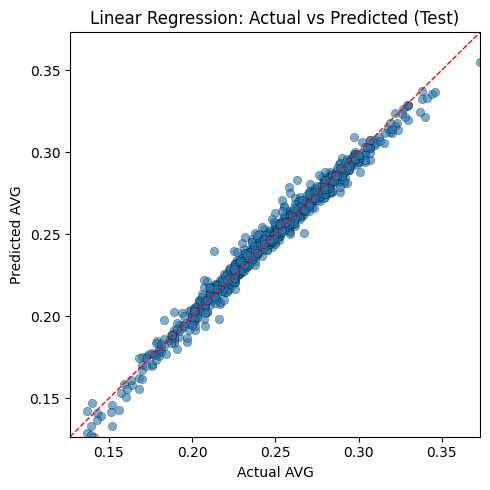

In [16]:
# Scatter plot: actual vs predicted (test)
plt.figure(figsize=(5,5))
plt.scatter(Y_test_lr, test_pred, alpha=0.6, edgecolor="k", linewidth=0.3)
lims = [min(Y_test_lr.min(), test_pred.min()), max(Y_test_lr.max(), test_pred.max())]
plt.plot(lims, lims, "r--", lw=1)
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("Actual AVG")
plt.ylabel("Predicted AVG")
plt.title("Linear Regression: Actual vs Predicted (Test)")
plt.tight_layout()
plt.show()


### Step 6: Save the Model

We'll save the trained model and coefficients to disk so they can be loaded later for predictions or further analysis.


In [17]:
# Save model and coefficients
joblib.dump(lin, "linear_regression_avg.pkl")
print("Saved model -> linear_regression_avg.pkl")
print("Saved coefficients -> linear_regression_coefficients.csv")


Saved model -> linear_regression_avg.pkl
Saved coefficients -> linear_regression_coefficients.csv


## Linear Regression Model for BABIP

We'll build a separate linear regression model to predict BABIP (Batting Average on Balls In Play). This model excludes batting average as a feature since it's highly correlated with BABIP, allowing us to understand which other features drive BABIP independently.



### Step 1: Load Data and Prepare Features

We'll extract BABIP as our target variable and prepare features by excluding both BABIP (the target) and AVG (to avoid correlation issues). We'll also handle any missing values.


In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load data
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")

# Extract BABIP targets
y_train = X_train['babip'].copy()
y_test = X_test['babip'].copy()

# Prepare features: drop babip (target) and avg (too correlated)
X_train_features = X_train.drop(columns=['babip', 'avg'], errors='ignore')
X_test_features = X_test.drop(columns=['babip', 'avg'], errors='ignore')

# Remove rows with missing BABIP
valid_train = ~y_train.isna()
valid_test = ~y_test.isna()
X_train_features = X_train_features[valid_train]
y_train = y_train[valid_train]
X_test_features = X_test_features[valid_test]
y_test = y_test[valid_test]

print("LINEAR REGRESSION (BABIP)")
print("=" * 40)
print(f"Train: {X_train_features.shape[0]} samples, {X_train_features.shape[1]} features")
print(f"Test:  {X_test_features.shape[0]} samples")


LINEAR REGRESSION (BABIP)
Train: 3499 samples, 53 features
Test:  875 samples


### Step 2: Train the Model

We'll fit a linear regression model to learn the relationship between our features and BABIP.


In [19]:
# Train model
model = LinearRegression()
model.fit(X_train_features, y_train)
print("Model training complete!")


Model training complete!


### Step 3: Evaluate Model Performance

We'll evaluate the BABIP model using the same metrics as the AVG model to compare performance.


In [20]:
# Evaluate
train_pred = model.predict(X_train_features)
test_pred = model.predict(X_test_features)

print(f"\nTrain -> MAE: {mean_absolute_error(y_train, train_pred):.4f} | "
      f"RMSE: {np.sqrt(mean_squared_error(y_train, train_pred)):.4f} | "
      f"R²: {r2_score(y_train, train_pred):.4f}")
print(f"Test  -> MAE: {mean_absolute_error(y_test, test_pred):.4f} | "
      f"RMSE: {np.sqrt(mean_squared_error(y_test, test_pred)):.4f} | "
      f"R²: {r2_score(y_test, test_pred):.4f}")



Train -> MAE: 0.0242 | RMSE: 0.0314 | R²: 0.4396
Test  -> MAE: 0.0253 | RMSE: 0.0324 | R²: 0.4018


### Step 4: Examine Feature Coefficients

The coefficients show which features are most important for predicting BABIP. This helps us understand what factors influence a player's ability to get hits on balls in play.


In [21]:
# Show top coefficients
coefs = pd.Series(model.coef_, index=X_train_features.columns).sort_values(key=abs, ascending=False)
print("\nTop 15 coefficients:")
print(coefs.head(15))



Top 15 coefficients:
ld          0.313859
fb         -0.239962
contact     0.139229
zcontact   -0.089767
swing       0.082707
hard        0.078324
gb         -0.078094
ocontact   -0.075318
pull       -0.061361
hr_fb       0.057328
swstr       0.051770
oppo        0.045822
iffb       -0.040660
zswing     -0.037896
bb_rate     0.036405
dtype: float64


### Step 5: Visualize Predictions

A scatter plot helps us see how well the model predicts BABIP values.


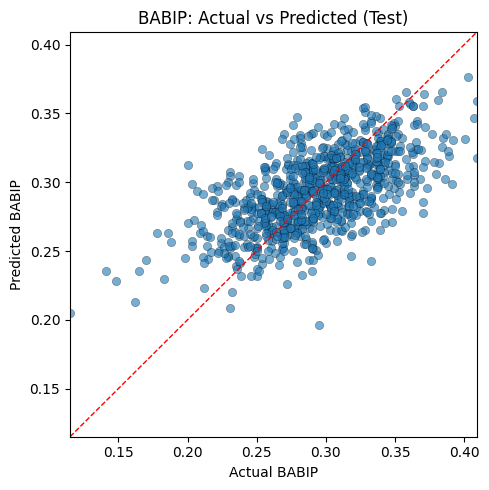

In [22]:
# Plot
plt.figure(figsize=(5, 5))
plt.scatter(y_test, test_pred, alpha=0.6, edgecolors='k', linewidth=0.3)
lims = [min(y_test.min(), test_pred.min()), max(y_test.max(), test_pred.max())]
plt.plot(lims, lims, 'r--', lw=1)
plt.xlim(lims)
plt.ylim(lims)
plt.xlabel("Actual BABIP")
plt.ylabel("Predicted BABIP")
plt.title("BABIP: Actual vs Predicted (Test)")
plt.tight_layout()
plt.show()


### Step 6: Save the Model

We'll save the trained BABIP model and coefficients for later use.

In [23]:
# Save
coefs.to_frame('coefficient').to_csv("linear_regression_babip_coefficients.csv")
joblib.dump(model, "linear_regression_babip.pkl")
print("Saved model -> linear_regression_babip.pkl")
print("Saved coefficients -> linear_regression_babip_coefficients.csv")


Saved model -> linear_regression_babip.pkl
Saved coefficients -> linear_regression_babip_coefficients.csv


Root mean squre error: 0.031210892524152628
saved model:


['rf_avg_model.pkl']

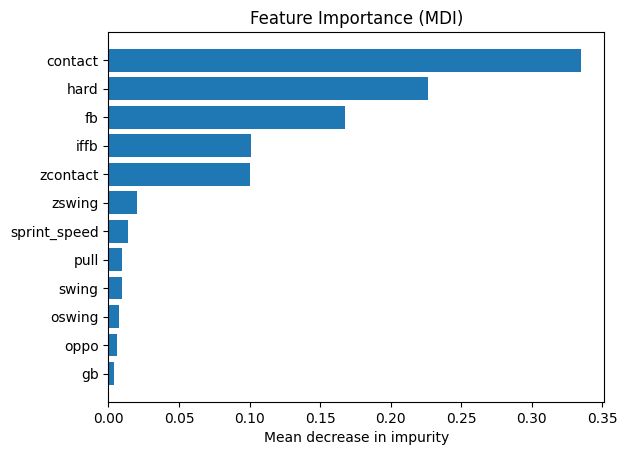

In [24]:
# Random Forest Model Training
# Source: https://kirenz.github.io/regression/docs/randomforest.html
from collections import OrderedDict


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import joblib

X_rf_train = pd.read_csv("X_train.csv")
X_rf_test = pd.read_csv("X_test.csv")
Y_rf_train = pd.read_csv("Y_train.csv")
Y_rf_test = pd.read_csv("Y_test.csv")

# currently does not inclue babip since it has a dominant effect/ hinders our ability to analyze other stats
selected_features = ["gb","fb","iffb","hard","pull","oppo","sprint_speed", "contact", "zcontact", "swing", "zswing", "oswing"]

X_rf_train = X_rf_train[selected_features]
X_rf_test = X_rf_test[selected_features]

# make flatten array
Y_rf_train = np.ravel(Y_rf_train)
Y_rf_test = np.ravel(Y_rf_test)


# define hyperparamerters
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "warm_start":True,
    "oob_score":True,
    "random_state": 42,
}

# build model
reg =RandomForestRegressor(**params)

reg.fit(X_rf_train, Y_rf_train)

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

#make prediction
Y_pred = reg.predict(X_rf_test)

# evaluate model with MSE
rmse = np.sqrt(mean_squared_error(Y_rf_test, Y_pred,))
print("Root mean squre error:", rmse)


# obtain feature importance
feature_importance = reg.feature_importances_

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(selected_features)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

# save model
print('saved model:')
joblib.dump(reg, "rf_avg_model.pkl")

# Mixed-Effects Modeling for BABIP ➜ AVG

This notebook builds a two-stage pipeline:
1) a **BABIP** mixed-effects model with a **CLR** transform for batted-ball composition,  
2) an **AVG** mixed-effects model that **uses predicted BABIP** as a feature.

**Audience:** Learners / Researchers  
**Use case:** How-To  
**Difficulty:** Intermediate (code-heavy; short explanations)  
**Estimated time:** ~90 minutes

**You will learn to**
- Apply a centered log-ratio (CLR) transform to compositional features.
- Fit random-intercept MixedLM models (player as group).
- Weight by PA via row replication.
- Standardize features, evaluate (MAE/RMSE/R², weighted variants), compute ICC.

# PART A — BABIP Model (CLR + MixedLM)

We first model **BABIP**. Steps:
1) ensure features exist and join from base if missing,  
2) re-express fly balls (`iffb_bip`, `fb_noI`),  
3) apply **CLR** to composition (`ld`, `gb`, `fb_noI`),  
4) standardize + PA weighting (row replication),  
5) fit MixedLM (random intercept by `id`),  
6) evaluate + ICC + coefficient ranking,  
7) save predictions and features for Stage B.

### A1.1 Load Training and Test Feature Files

We begin by loading the two datasets that will feed into our BABIP modeling pipeline:

- **`X_train.csv`** — training-season features  
- **`X_test.csv`** — test-season features  

At this point, these files contain only the features that were created during your
cross-validation partitioning (e.g., swing rates, contact %, etc.). They may be missing
some BABIP-specific variables, which we will backfill next.

Loading the two tables now lets us check their shapes and confirm we’re working with 
the expected number of rows.


In [25]:
import pandas as pd
import numpy as np

X_train = pd.read_csv("X_train.csv")
X_test  = pd.read_csv("X_test.csv")

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (3499, 54)
Test shape : (875, 54)


### A1.2 Define Required BABIP Inputs

Our BABIP model relies on a specific set of batted-ball and hitting attributes,
including:

- **Batted-ball composition variables** (`ld`, `gb`, `fb`, `iffb`)
- **Contact-quality variables** (`hard`, `pull`, `oppo`, `sprint_speed`)
- **Player identifiers** (`id`, `season`)
- **Plate appearances** (`pa`) for weighting later

We check whether these columns already exist in the training and test matrices.
If not, we’ll pull them from the master dataset (`cleaned_batting_data.csv`).

This “required feature check” is essential because MixedLM expects complete data.


In [26]:
babip_raw = ["ld","gb","fb","iffb","hard","pull","oppo","sprint_speed"]
carry_cols = ["id","season","pa"]
needed = babip_raw + carry_cols

missing_tr = [c for c in needed if c not in X_train.columns]
missing_te = [c for c in needed if c not in X_test.columns]

print("Missing (train):", missing_tr)
print("Missing (test) :", missing_te)


Missing (train): []
Missing (test) : []


### A1.3 Backfill Missing Columns from Base Dataset

If `X_train` or `X_test` is missing one or more required BABIP columns,
we merge them in from **`cleaned_batting_data.csv`**, which contains all original
Statcast-derived features.

We join on (`id`, `season`) because mixed-effects models require aligned identity
and season-level grouping.

This step ensures both split datasets have identical feature sets.


In [27]:
if missing_tr or missing_te:
    base = pd.read_csv("cleaned_batting_data.csv")
    join_keys = ["id","season"]

    fetch = list(set(needed + join_keys))
    X_train = X_train.merge(base[fetch], on=join_keys, how="left")
    X_test  = X_test.merge(base[fetch],  on=join_keys, how="left")


### A1.4 Extract Only the BABIP-Relevant Columns

We now isolate only the columns needed for BABIP modeling.

This helps keep the MixedLM formula clean and ensures that downstream steps 
(processing, CLR-transform, replication) operate only on relevant variables.

The result is:
- `X_babip_train`
- `X_babip_test`

both containing exactly the same set of BABIP inputs.


In [28]:
X_babip_train = X_train[needed].copy()
X_babip_test  = X_test[needed].copy()


### A1.5 Attach BABIP Target Values

We now bring in the **actual BABIP** values from the base dataset.

Mixed-effects models require a target variable (`babip`) to estimate coefficients.
Any row missing `babip` cannot contribute to fitting, so we drop such rows.

After this step:
- `train_babip` contains full training data and target values  
- `test_babip` contains data used only for final evaluation  


In [29]:
base = pd.read_csv("cleaned_batting_data.csv")

train_babip = X_babip_train.merge(
    base[["id","season","babip"]],
    on=["id","season"],
    how="left"
)

test_babip = X_babip_test.merge(
    base[["id","season","babip"]],
    on=["id","season"],
    how="left"
)

train_babip = train_babip.dropna(subset=["babip"])


### A2.1 Re-Express Fly Balls on the BIP (Balls-in-Play) Scale

Raw `fb` and `iffb` don’t represent separate components of the batted-ball distribution.
To model BABIP, we need mutually exclusive proportions:

- **Infield fly balls** → `iffb_bip = fb * iffb`
- **Outfield fly balls (non-IFFB)** → `fb_noI = fb * (1 - iffb)`

This prevents collinearity and allows feeds into a CLR transformation later.


In [30]:
for df_ in (train_babip, test_babip):
    df_["iffb_bip"] = df_["fb"] * df_["iffb"]
    df_["fb_noI"]   = df_["fb"] * (1 - df_["iffb"])


### A2.2 Build the Centered Log-Ratio (CLR) Function

CLR is crucial for modeling **compositional data** such as LD%, GB%, FB%.

Why?

Because these values form parts of a whole.  
Traditional regression treats them as independent, but they’re not —
if LD increases, something else must decrease.

CLR converts them into log ratios relative to their geometric mean:

$\text{clr}(x_i) = \log(x_i) - \frac{1}{D}\sum_j \log(x_j)$


This removes the “unit-sum” constraint and makes the data compatible with linear models.


In [31]:
def clr_transform(df, cols):
    comp = df[cols].clip(1e-6, 1)      # avoid log(0)
    logv = np.log(comp)
    gm = logv.mean(axis=1)
    clr = logv.sub(gm, axis=0)
    clr.columns = ["clr_" + c for c in cols]
    return clr


### A2.3 Apply CLR to LD, GB, and FB_noIFFB

We apply the CLR function to:
- line drives (`ld`)
- ground balls (`gb`)
- outfield fly balls (`fb_noI`)

This produces transformed predictors that capture **relative composition**, 
which is more meaningful than raw percentages for BABIP modeling.


In [32]:
comp_cols = ["ld", "gb", "fb_noI"]

train_clr = clr_transform(train_babip, comp_cols)
test_clr  = clr_transform(test_babip,  comp_cols)


### A2.4 Build Final BABIP Modeling DataFrames

We now assemble the full modeling matrices by combining:

- Player identifiers (`id`, `season`)
- Plate appearances (`pa`)
- Target variable (`babip`)
- CLR-transformed features
- Other contact-quality features (`iffb_bip`, `hard`, `pull`, `oppo`, `sprint_speed`)

Keeping everything in a single table simplifies the MixedLM formula later.


In [33]:
other = ["iffb_bip","hard","pull","oppo","sprint_speed"]

train_babip_clr = pd.concat([
    train_babip[["id","season","pa","babip"]],
    train_clr,
    train_babip[other]
], axis=1)

test_babip_clr = pd.concat([
    test_babip[["id","season","pa","babip"]],
    test_clr,
    test_babip[other]
], axis=1)


### A2.5 Select Fixed Effects for MixedLM

We keep:
- `clr_ld`  
- `clr_gb`  
and *exclude* `clr_fb_noI`, which becomes the reference part of the composition.

This avoids multicollinearity because CLR values sum to zero.


In [34]:
babip_fixed = ["clr_ld","clr_gb"] + other


### A3.1 Standardize (Z-Score) All Predictors

Mixed-effects models benefit from standardized predictors:

- Helps optimizer converge
- Makes coefficients comparable in scale
- Avoids numerical instability

We apply a `StandardScaler` fit only on training data.


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_babip_clr[babip_fixed])

train_s = train_babip_clr.copy()
test_s  = test_babip_clr.copy()

train_s[babip_fixed] = scaler.transform(train_s[babip_fixed])
test_s[babip_fixed]  = scaler.transform(test_s[babip_fixed])


### A3.2 Compute Plate-Appearance Weights

Players with more PA provide more reliable estimates of BABIP.  
To reflect this, we weight each row proportional to its PA:

\[
w_i = \text{round}\left(\frac{PA_i}{\text{median}(PA)}\right)
\]

This creates a pseudo–weighted regression via **row replication**, since MixedLM
does not natively support per-row weights.


In [36]:
pa = train_s["pa"].astype(float)
ratio = pa / pa.median()
w = np.clip(np.rint(ratio), 1, 20).astype(int)


### A3.3 Expand Dataset by Row Replication (Weighting Trick)

We repeat each row `w_i` times to create a weighted training dataset that simulates
PA-based importance.

This is a common workaround when fitting mixed-effects models that do not accept
direct observation weights.


In [37]:
idx = np.arange(len(train_s))
exp_idx = np.repeat(idx, w)

train_exp = train_s.iloc[exp_idx].copy()


### A4.1 Build MixedLM Formula (Fixed + Random Effects)

We specify:

- **Fixed effects:** all standardized BABIP predictors  
- **Random effect:** random intercept per `id` (player-level differences)

This structure accounts for repeated seasons for the same player.


In [38]:
import statsmodels.formula.api as smf

train_exp["id"] = train_exp["id"].astype("category")
test_s["id"]     = test_s["id"].astype("category")

formula = "babip ~ " + " + ".join(babip_fixed)


### A4.2 Fit MixedLM with Multiple Solvers

MixedLM can be sensitive to optimizer choice, so we attempt:

- L-BFGS  
- BFGS  
- Powell  

We keep whichever one converges first.


In [39]:
md = smf.mixedlm(formula, train_exp, groups=train_exp["id"])

fit_babip = None
methods = ["lbfgs","bfgs","powell"]

for m in methods:
    try:
        f = md.fit(method=m, reml=True, maxiter=500)
        if f.converged:
            fit_babip = f
            break
    except:
        pass

if fit_babip is None:
    raise RuntimeError("MixedLM failed to converge.")


/Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### A4.3 Generate Train/Test Predictions

We now obtain predicted BABIP for:

- Training set (`train_s`)
- Test set (`test_s`)

These predictions will later be used in the AVG model.


In [40]:
train_pred = fit_babip.predict(train_s)
test_pred  = fit_babip.predict(test_s)


### A5.1 Compute Accuracy Metrics

We measure:

- **MAE** (average absolute error)
- **RMSE** (penalizes larger errors)
- **R²** (explained variance)

We compute these for both train and test sets to evaluate generalization.


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_tr = train_s["babip"].values
y_te = test_s["babip"].values

tr_mae = mean_absolute_error(y_tr, train_pred)
te_mae = mean_absolute_error(y_te, test_pred)

tr_rmse = np.sqrt(mean_squared_error(y_tr, train_pred))
te_rmse = np.sqrt(mean_squared_error(y_te, test_pred))

tr_r2 = r2_score(y_tr, train_pred)
te_r2 = r2_score(y_te, test_pred)


### A5.2 Compute PA-Weighted Errors

Weighted errors give more importance to seasons with more PA,  
aligning evaluation with our modeling philosophy.

These are often more meaningful than unweighted metrics in baseball.


In [42]:
def wmae(y, yhat, w): return np.average(np.abs(y - yhat), weights=w)
def wrmse(y, yhat, w): return np.sqrt(np.average((y - yhat)**2, weights=w))

tr_wmae = wmae(y_tr, train_pred, train_s["pa"])
te_wmae = wmae(y_te, test_pred, test_s["pa"])


### A5.3 Compute ICC (Intraclass Correlation Coefficient)

ICC measures how much of the variance in BABIP exists **between players** 
(between-id random effect) rather than within seasons.

High ICC → large player-to-player differences  
Low ICC → most variance is within-player season-to-season noise


In [43]:
re_var = fit_babip.cov_re.iloc[0,0]
res_var = fit_babip.scale
icc = re_var / (re_var + res_var)


### A5.4 Rank Coefficients by Importance

Since all predictors were standardized, their coefficients are directly comparable.  
We sort by absolute value to see which features contribute most to predicting BABIP.


In [44]:
params = fit_babip.params
pvals  = fit_babip.pvalues

effects = [(c, params[c], pvals[c]) for c in babip_fixed if c in params]
effects.sort(key=lambda x: abs(x[1]), reverse=True)


### A5.5 Print BABIP Model Accuracy Metrics

This block prints all standard evaluation metrics:
- R², MAE, RMSE (train and test)
- PA-weighted MAE/RMSE (gives more influence to high-PA seasons)

These numbers tell us how well the model is capturing BABIP on both splits.


In [45]:
print("\n" + "="*70)
print("BABIP MODEL PERFORMANCE")
print("="*70)

# Accuracy metrics
print("\nAccuracy Metrics:")
print(f"  Train R²:        {tr_r2:.4f}  |  Test R²:        {te_r2:.4f}")
print(f"  Train MAE:       {tr_mae:.4f}  |  Test MAE:       {te_mae:.4f}")
print(f"  Train RMSE:      {tr_rmse:.4f} |  Test RMSE:      {te_rmse:.4f}")
print(f"  PA-Weighted MAE: {tr_wmae:.4f} |  PA-Weighted MAE: {te_wmae:.4f}")
print(f"  PA-Weighted RMSE:{wrmse(y_tr, train_pred, train_s['pa']):.4f} | "
      f"PA-Weighted RMSE:{wrmse(y_te, test_pred, test_s['pa']):.4f}")



BABIP MODEL PERFORMANCE

Accuracy Metrics:
  Train R²:        0.3777  |  Test R²:        0.3474
  Train MAE:       0.0255  |  Test MAE:       0.0266
  Train RMSE:      0.0331 |  Test RMSE:      0.0339
  PA-Weighted MAE: 0.0226 |  PA-Weighted MAE: 0.0238
  PA-Weighted RMSE:0.0292 | PA-Weighted RMSE:0.0303


### A5.6 Print Train–Test Generalization Gap

We compare training vs. test performance to check for overfitting.  
Small gaps mean the model generalizes well rather than memorizing players.


In [46]:
r2_gap = tr_r2 - te_r2
mae_gap = te_mae - tr_mae

print("\nGeneralization:")
print(f"  R² gap:  {r2_gap:+.4f} {'✓ Good' if r2_gap < 0.10 else '⚠ Possible overfitting'}")
print(f"  MAE gap: {mae_gap:+.4f} {'✓ Good' if mae_gap < 0.005 else '⚠ Possible overfitting'}")



Generalization:
  R² gap:  +0.0303 ✓ Good
  MAE gap: +0.0012 ✓ Good


### A5.7 Print Random-Effects ICC

The ICC tells us how much of BABIP variation comes from stable player-to-player
differences vs. randomness. It comes directly from the fitted mixed model.


In [47]:
re_var = fit_babip.cov_re.iloc[0,0]
res_var = fit_babip.scale
icc = re_var / (re_var + res_var)

print(f"\nRandom Effects ICC: {icc:.4f} ({icc*100:.1f}% variance is between-player)")



Random Effects ICC: 0.1844 (18.4% variance is between-player)


### A5.8 Print Ranked Standardized Coefficients

This lists the fixed-effect coefficients from strongest → weakest impact.
Because features were standardized, the magnitudes are comparable.


In [48]:
print("\n" + "="*70)
print("FEATURE IMPORTANCE (Ranked by Impact)")
print("="*70)

def sig(p):
    return "***" if p<0.001 else "**" if p<0.01 else "*" if p<0.05 else ""

effects = []
for name in babip_fixed:
    if name in params:
        effects.append((name, params[name], pvals[name]))

effects.sort(key=lambda x: abs(x[1]), reverse=True)

feature_labels = {
    "clr_ld": "Line Drives (vs FB)",
    "clr_gb": "Ground Balls (vs FB)",
    "iffb_bip": "Infield Fly Balls",
    "hard": "Hard Contact",
    "pull": "Pull Direction",
    "oppo": "Opposite Field",
    "sprint_speed": "Sprint Speed"
}

print("\nRanked by magnitude (standardized coefficients):")
for i,(name,val,p) in enumerate(effects,1):
    arrow = "↑" if val > 0 else "↓"
    label = feature_labels.get(name,name)
    print(f"  {i}. {label:25s} {arrow} {abs(val):.4f} {sig(p)}")

print("\n(*** p<0.001, ** p<0.01, * p<0.05)")



FEATURE IMPORTANCE (Ranked by Impact)

Ranked by magnitude (standardized coefficients):
  1. Line Drives (vs FB)       ↑ 0.0174 ***
  2. Sprint Speed              ↑ 0.0087 ***
  3. Hard Contact              ↑ 0.0082 ***
  4. Infield Fly Balls         ↓ 0.0079 ***
  5. Ground Balls (vs FB)      ↑ 0.0065 ***
  6. Pull Direction            ↓ 0.0032 ***
  7. Opposite Field            ↑ 0.0020 *

(*** p<0.001, ** p<0.01, * p<0.05)


### A6. Save Predictions and Feature Matrices

We save:

- **Train/test predictions**  
- **Standardized feature matrices**  

These will be used directly by the **AVG model** in Part B.


In [49]:
train_out = train_s[["id","season"]].copy()
train_out["babip_actual"] = y_tr
train_out["babip_pred"]   = train_pred

test_out = test_s[["id","season"]].copy()
test_out["babip_actual"] = y_te
test_out["babip_pred"]   = test_pred

train_out.to_csv("pred_babip_train.csv", index=False)
test_out.to_csv("pred_babip_test.csv", index=False)

train_s.to_csv("train_babip_clr_features.csv", index=False)
test_s.to_csv("test_babip_clr_features.csv", index=False)


# PART B — AVG Model (MixedLM with Predicted BABIP)

In Part B, we build a **mixed-effects model for batting average (AVG)**.

Key idea:  
Instead of predicting AVG directly from swing/contact stats alone, we **add the predicted BABIP** from Part A as a feature. That way, the AVG model can:

- Use **plate discipline** to understand how often the ball is put in play.
- Use **predicted BABIP** to summarize quality of contact once the ball is in play.

We’ll:
1. Load AVG features and merge in `babip_pred`.  
2. Attach the actual `avg` target.  
3. Standardize predictors and apply PA-based weighting.  
4. Fit a random-intercept MixedLM grouped by player (`id`).  
5. Evaluate performance + generalization.  
6. Rank feature importance.  
7. Save predictions and features.


### B1. Load AVG Feature Data and Predicted BABIP

We start by loading:

- `X_train.csv` / `X_test.csv`: base feature matrices  
- `pred_babip_train.csv` / `pred_babip_test.csv`: outputs from the BABIP model  

We’ll merge predicted BABIP onto the AVG feature sets using (`id`, `season`).


In [50]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load base feature splits
X_train = pd.read_csv("X_train.csv")
X_test  = pd.read_csv("X_test.csv")

# Load predicted BABIP from Part A
pred_babip_train = pd.read_csv("pred_babip_train.csv")
pred_babip_test  = pd.read_csv("pred_babip_test.csv")


### B1.1 Define Required AVG Features and Backfill

The AVG model uses:

- Plate discipline / swing metrics:  
  `bb_rate`, `k_rate`, `swstr`, `oswing`, `zswing`, `ocontact`, `zcontact`
- Carry-over columns: `id`, `season`, `pa`

If any are missing from `X_train` or `X_test`, we pull them from `cleaned_batting_data.csv`
to make sure our train/test matrices have identical, complete features.


In [51]:
avg_features = ["bb_rate", "k_rate", "swstr",
                "oswing", "zswing", "ocontact", "zcontact"]

carry_cols = ["id", "season", "pa"]
needed = avg_features + carry_cols

missing_tr = [c for c in needed if c not in X_train.columns]
missing_te = [c for c in needed if c not in X_test.columns]

print("Missing (train):", missing_tr)
print("Missing (test) :", missing_te)


Missing (train): []
Missing (test) : []


### B1.2 Backfill AVG Features from Base Dataset

If `X_train` / `X_test` are missing any required columns, we join them from
`cleaned_batting_data.csv` using (`id`, `season`) as keys.


In [52]:
if missing_tr or missing_te:
    base = pd.read_csv("cleaned_batting_data.csv")
    join_keys = ["id", "season"]

    fetch_cols = list(set(needed + join_keys))
    X_train = X_train.merge(base[fetch_cols], on=join_keys, how="left")
    X_test  = X_test.merge(base[fetch_cols],  on=join_keys, how="left")


### B1.3 Extract AVG Inputs and Attach Predicted BABIP

We now:

1. Subset to the AVG-related columns.  
2. Merge in `babip_pred` from Part A using (`id`, `season`).

This creates `X_avg_train` and `X_avg_test` with both plate discipline and
predicted BABIP information.


In [53]:
X_avg_train = X_train[needed].copy()
X_avg_test  = X_test[needed].copy()

X_avg_train = X_avg_train.merge(
    pred_babip_train[["id", "season", "babip_pred"]],
    on=["id", "season"],
    how="left"
)

X_avg_test = X_avg_test.merge(
    pred_babip_test[["id", "season", "babip_pred"]],
    on=["id", "season"],
    how="left"
)


### B2. Attach Actual AVG Values

We now join the **actual batting average `avg`** from `cleaned_batting_data.csv`
onto our AVG feature matrices.

Any row missing `avg` is dropped, since it cannot be used as a training/example point.


In [54]:
base = pd.read_csv("cleaned_batting_data.csv")

train_avg = X_avg_train.merge(
    base[["id", "season", "avg"]],
    on=["id", "season"],
    how="left"
)

test_avg = X_avg_test.merge(
    base[["id", "season", "avg"]],
    on=["id", "season"],
    how="left"
)

train_avg = train_avg.dropna(subset=["avg"]).copy()
test_avg  = test_avg.dropna(subset=["avg"]).copy()

print("Training samples:", len(train_avg))
print("Test samples    :", len(test_avg))


Training samples: 3499
Test samples    : 875


### B3. Standardize AVG Features (including predicted BABIP)

We build the list of fixed-effect predictors:

- The 7 plate discipline features  
- `babip_pred` from the BABIP model

Then we **standardize** them with `StandardScaler` so:

- Optimization is more stable  
- Coefficients are directly comparable in magnitude


In [55]:
avg_fixed = avg_features + ["babip_pred"]

scaler_avg = StandardScaler().fit(train_avg[avg_fixed])

train_avg_s = train_avg.copy()
test_avg_s  = test_avg.copy()

train_avg_s[avg_fixed] = scaler_avg.transform(train_avg[avg_fixed])
test_avg_s[avg_fixed]  = scaler_avg.transform(test_avg[avg_fixed])


### B3.1 Compute PA-Based Weights and Expand Training Data

As in BABIP, we weight each row proportional to PA:

$w_i = \text{round}\left(\frac{PA_i}{\text{median}(PA)}\right)$

Then we **replicate rows** `w_i` times to give high-PA seasons more influence
in the mixed-effects model.


In [56]:
pa_avg = train_avg_s["pa"].astype(float)
ratio_avg = pa_avg / pa_avg.median()
w_avg = np.clip(np.rint(ratio_avg), 1, 20).astype(int)

idx = np.arange(len(train_avg_s))
exp_idx = np.repeat(idx, w_avg)

train_avg_exp = train_avg_s.iloc[exp_idx].copy()


### B4. Fit Mixed-Effects Model for AVG

We fit a MixedLM with:

- **Fixed effects:** standardized AVG predictors (including `babip_pred`)  
- **Random intercept:** per-player (`id`) to capture individual hitting baselines

We try several optimizers and keep the first one that converges.


In [57]:
train_avg_exp["id"] = train_avg_exp["id"].astype("category")
test_avg_s["id"]    = test_avg_s["id"].astype("category")

formula_avg = "avg ~ " + " + ".join(avg_fixed)
md_avg = smf.mixedlm(formula_avg, train_avg_exp, groups=train_avg_exp["id"])

fit_avg = None
for method in ["lbfgs", "bfgs", "powell"]:
    try:
        f = md_avg.fit(method=method, reml=True, maxiter=500)
        if f.converged:
            fit_avg = f
            break
    except Exception:
        continue

if fit_avg is None:
    raise RuntimeError("AVG MixedLM failed to converge.")


/Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### B4.1 Predict AVG for Train and Test Sets

We now use the fitted model to generate:

- `train_avg_pred`: fitted AVG on the training split  
- `test_avg_pred`: out-of-sample predictions on the test split


In [58]:
train_avg_pred = fit_avg.predict(train_avg_s)
test_avg_pred  = fit_avg.predict(test_avg_s)

y_tr_avg = train_avg_s["avg"].values
y_te_avg = test_avg_s["avg"].values
w_tr_avg = train_avg_s["pa"].values
w_te_avg = test_avg_s["pa"].values


### B5. Compute AVG Model Metrics (MAE, RMSE, R²)

We compute standard regression metrics to summarize how well the model predicts AVG:

- **MAE**: average absolute error  
- **RMSE**: error that penalizes big misses more  
- **R²**: fraction of variance in AVG explained by the model


In [59]:
tr_mae_avg = mean_absolute_error(y_tr_avg, train_avg_pred)
te_mae_avg = mean_absolute_error(y_te_avg, test_avg_pred)

tr_rmse_avg = np.sqrt(mean_squared_error(y_tr_avg, train_avg_pred))
te_rmse_avg = np.sqrt(mean_squared_error(y_te_avg, test_avg_pred))

tr_r2_avg = r2_score(y_tr_avg, train_avg_pred)
te_r2_avg = r2_score(y_te_avg, test_avg_pred)


### B5.1 Compute PA-Weighted MAE and RMSE

As before, we also compute **PA-weighted** metrics so that full, high-PA seasons
have more influence on the error summary.


In [60]:
tr_wmae_avg = wmae(y_tr_avg, train_avg_pred, w_tr_avg)
te_wmae_avg = wmae(y_te_avg, test_avg_pred, w_te_avg)

tr_wrmse_avg = wrmse(y_tr_avg, train_avg_pred, w_tr_avg)
te_wrmse_avg = wrmse(y_te_avg, test_avg_pred, w_te_avg)


### B5.2 Print AVG Model Performance and Generalization

This block prints:

- Train/test R², MAE, RMSE  
- PA-weighted MAE/RMSE  
- Train–test gaps (to check for overfitting)


In [61]:
print("\n" + "="*70)
print("BATTING AVERAGE MODEL PERFORMANCE")
print("="*70)

print("\nAccuracy Metrics:")
print(f"  Train R²:        {tr_r2_avg:.4f}  |  Test R²:        {te_r2_avg:.4f}")
print(f"  Train MAE:       {tr_mae_avg:.4f} |  Test MAE:       {te_mae_avg:.4f}")
print(f"  Train RMSE:      {tr_rmse_avg:.4f} |  Test RMSE:      {te_rmse_avg:.4f}")
print(f"  PA-Weighted MAE: {tr_wmae_avg:.4f} |  PA-Weighted MAE: {te_wmae_avg:.4f}")
print(f"  PA-Weighted RMSE:{tr_wrmse_avg:.4f} |  PA-Weighted RMSE:{te_wrmse_avg:.4f}")



BATTING AVERAGE MODEL PERFORMANCE

Accuracy Metrics:
  Train R²:        0.4585  |  Test R²:        0.4570
  Train MAE:       0.0210 |  Test MAE:       0.0215
  Train RMSE:      0.0268 |  Test RMSE:      0.0271
  PA-Weighted MAE: 0.0191 |  PA-Weighted MAE: 0.0198
  PA-Weighted RMSE:0.0244 |  PA-Weighted RMSE:0.0249


### B5.3 Print Generalization Gap (Train vs Test)

We compare training and test performance:

- If the train metrics are much better than test, the model may be overfitting.  
- Small gaps indicate the model generalizes well to unseen seasons.


In [62]:
r2_gap_avg = tr_r2_avg - te_r2_avg
mae_gap_avg = te_mae_avg - tr_mae_avg

print("\nGeneralization:")
print(f"  R² gap:  {r2_gap_avg:+.4f} "
      f"{'✓ Good' if r2_gap_avg < 0.10 else '⚠ Possible overfitting'}")
print(f"  MAE gap: {mae_gap_avg:+.4f} "
      f"{'✓ Good' if mae_gap_avg < 0.005 else '⚠ Possible overfitting'}")



Generalization:
  R² gap:  +0.0015 ✓ Good
  MAE gap: +0.0006 ✓ Good


### B5.4 Compute ICC for AVG Model

We compute the intraclass correlation coefficient (ICC) to measure how much
AVG variation is explained by stable player-to-player differences vs noise.


In [63]:
re_var_avg = fit_avg.cov_re.iloc[0, 0]
res_var_avg = fit_avg.scale
icc_avg = re_var_avg / (re_var_avg + res_var_avg)

print(f"\nRandom Effects ICC: {icc_avg:.4f} ({icc_avg*100:.1f}% variance is between-player)")



Random Effects ICC: 0.2472 (24.7% variance is between-player)


### B6. Rank Standardized Coefficients for AVG Model

Because all features are standardized, the size of a coefficient tells us
how strongly that predictor moves AVG (in standard deviation units).

We sort by absolute value and print their names, directions, and significance.


In [64]:
print("\n" + "="*70)
print("FEATURE IMPORTANCE (Ranked by Impact)")
print("="*70)

params_avg = fit_avg.params
pvals_avg  = fit_avg.pvalues

def sig(p):
    return "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else ""

labels_avg = {
    "bb_rate":    "Walk Rate (BB%)",
    "k_rate":     "Strikeout Rate (K%)",
    "swstr":      "Swing & Miss (SwStr%)",
    "oswing":     "Chase Rate (O-Swing%)",
    "zswing":     "Zone Swing (Z-Swing%)",
    "ocontact":   "Chase Contact (O-Contact%)",
    "zcontact":   "Zone Contact (Z-Contact%)",
    "babip_pred": "Predicted BABIP"
}

effects_avg = []
for name in avg_fixed:
    if name in params_avg:
        effects_avg.append((name, params_avg[name], pvals_avg.get(name, 1.0)))

effects_avg.sort(key=lambda x: abs(x[1]), reverse=True)

print("\nRanked by magnitude (standardized coefficients):")
for i, (name, coef, p) in enumerate(effects_avg, 1):
    arrow = "↑" if coef > 0 else "↓"
    label = labels_avg.get(name, name)
    print(f"  {i}. {label:30s} {arrow} {abs(coef):.4f} {sig(p)}")

print("\n(*** p<0.001, ** p<0.01, * p<0.05)")



FEATURE IMPORTANCE (Ranked by Impact)

Ranked by magnitude (standardized coefficients):
  1. Strikeout Rate (K%)            ↓ 0.0247 ***
  2. Predicted BABIP                ↑ 0.0168 ***
  3. Chase Contact (O-Contact%)     ↓ 0.0036 
  4. Chase Rate (O-Swing%)          ↑ 0.0034 *
  5. Zone Contact (Z-Contact%)      ↓ 0.0030 
  6. Walk Rate (BB%)                ↑ 0.0029 ***
  7. Swing & Miss (SwStr%)          ↑ 0.0025 
  8. Zone Swing (Z-Swing%)          ↑ 0.0011 

(*** p<0.001, ** p<0.01, * p<0.05)


### B7. Save AVG Predictions and Standardized Feature Matrices

Finally, we save:

- `pred_avg_train.csv` and `pred_avg_test.csv`: actual vs predicted AVG + residuals  
- `train_avg_features.csv` / `test_avg_features.csv`: standardized inputs used by the AVG model  

These files can be reused for visualization, diagnostics, or building downstream metrics.


In [65]:
pred_train_avg = train_avg_s[["id", "season"]].copy()
pred_test_avg  = test_avg_s[["id", "season"]].copy()

pred_train_avg["avg_actual"] = y_tr_avg
pred_train_avg["avg_pred"]   = train_avg_pred
pred_train_avg["residual"]   = y_tr_avg - train_avg_pred

pred_test_avg["avg_actual"] = y_te_avg
pred_test_avg["avg_pred"]   = test_avg_pred
pred_test_avg["residual"]   = y_te_avg - test_avg_pred

pred_train_avg.to_csv("pred_avg_train.csv", index=False)
pred_test_avg.to_csv("pred_avg_test.csv", index=False)
train_avg_s.to_csv("train_avg_features.csv", index=False)
test_avg_s.to_csv("test_avg_features.csv", index=False)

print("\n" + "="*70)
print("✓ AVG MODEL TRAINING COMPLETE - Predictions saved")
print("="*70)



✓ AVG MODEL TRAINING COMPLETE - Predictions saved


# Batting Average Ability (BAA) Model

This notebook constructs a reproducible metric called **Batting Average Ability (BAA)**.  
BAA combines plate-discipline and contact-quality skill into a standardized index centered at **100**, similar in style to wRC+ or OPS+.

We'll walk through loading data, preparing features, applying pre-fit model coefficients, and producing interpretable player-level BAA scores.


# Step 1: Load and Inspect Data

In this step, we load the cleaned batting dataset and confirm that all required columns exist.  
These columns include plate-discipline stats, contact-quality stats, and raw hitting stats.


In [66]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --------------------------------------------------------------
# 1. LOAD DATA
# --------------------------------------------------------------
df = pd.read_csv("cleaned_batting_data.csv")

print("Columns in df:\n", df.columns.tolist())


Columns in df:
 ['id', 'season', 'pa', 'avg', 'babip', 'bb_rate', 'k_rate', 'sprint_speed', 'swstr', 'oswing', 'zswing', 'swing', 'ocontact', 'zcontact', 'contact', 'ld', 'gb', 'fb', 'iffb', 'hr_fb', 'pull', 'oppo', 'hard', 'team_- - -', 'team_ARI', 'team_ATL', 'team_BAL', 'team_BOS', 'team_CHC', 'team_CHW', 'team_CIN', 'team_CLE', 'team_COL', 'team_DET', 'team_HOU', 'team_KCR', 'team_LAA', 'team_LAD', 'team_MIA', 'team_MIL', 'team_MIN', 'team_NYM', 'team_NYY', 'team_OAK', 'team_PHI', 'team_PIT', 'team_SDP', 'team_SEA', 'team_SFG', 'team_STL', 'team_TBR', 'team_TEX', 'team_TOR', 'team_WSN', 'player_id']


# Step 2: Compute Raw Batting Average

We compute a consistent `raw_ba` field using either `H`/`AB` or an existing `avg` column.  
This gives us an observed baseline for comparing our modeled BAA results.


In [67]:
# --------------------------------------------------------------
# 2. RAW BATTING AVERAGE
# --------------------------------------------------------------
if {"H", "AB"}.issubset(df.columns):
    df["raw_ba"] = df["H"] / df["AB"]
elif "avg" in df.columns:
    df["raw_ba"] = df["avg"]
else:
    raise ValueError("Need either H & AB or avg column to compute raw_ba")


# Step 3: Define Feature Groups

Next, we define the two sets of input features used in the BAA model:

- **Plate discipline:** swing decisions, whiff rate, strikeout rate, walk rate  
- **Contact quality:** batted-ball profile, hard contact, sprint speed  

We check to ensure all of these columns exist in the dataset.


In [68]:
# --------------------------------------------------------------
# 3. DEFINE FEATURES 
# --------------------------------------------------------------
plate_features = [
    "k_rate",
    "ocontact",
    "oswing",
    "zcontact",
    "bb_rate",
    "swstr",
    "zswing",
]

contact_features = [
    "ld",
    "sprint_speed",
    "hard",
    "iffb",
    "gb",
    "pull",
    "oppo",
]

all_features = plate_features + contact_features

missing = [c for c in all_features if c not in df.columns]
if missing:
    raise ValueError(f"Missing required feature columns: {missing}")


# Step 4: Filter Qualified Seasons and Remove Missing Data

To reduce noise and ensure stable modeling results, we keep only hitter seasons with at least **200 plate appearances**.  
We also drop any rows with missing values in the required feature columns.


In [69]:
# --------------------------------------------------------------
# 4. FILTER BY PA AND DROP NAs
# --------------------------------------------------------------
MIN_PA = 200
if "pa" in df.columns:
    df = df[df["pa"] >= MIN_PA].copy()
elif "PA" in df.columns:
    df = df[df["PA"] >= MIN_PA].copy()

mask = df[all_features].notnull().all(axis=1)
df_model = df.loc[mask].copy()


# Step 5: Standardize Model Features (Z-Scores)

All BAA coefficients correspond to features standardized with z-scores.  
Here we apply `StandardScaler` and create new columns with a `_z` suffix for use in the scoring formulas.


In [70]:
# --------------------------------------------------------------
# 5. STANDARDIZE FEATURES
# --------------------------------------------------------------
scaler = StandardScaler()
z_cols = [f + "_z" for f in all_features]
df_model[z_cols] = scaler.fit_transform(df_model[all_features])


# Step 6: Compute Plate Score and Contact Score

Using the regression coefficients for each model component, we calculate:

- **plate_score** — skill from plate discipline  
- **contact_score** — skill from contact quality  

We then sum these into a combined `baa_raw` value.


In [71]:
# --------------------------------------------------------------
# 6. APPLY COEFFICIENTS (WITHOUT pred_babip TERM)
# --------------------------------------------------------------
df_model["plate_score"] = (
    -0.0249 * df_model["k_rate_z"] +
    -0.0037 * df_model["ocontact_z"] +
     0.0034 * df_model["oswing_z"] +
    -0.0029 * df_model["zcontact_z"] +
     0.0029 * df_model["bb_rate_z"] +
     0.0027 * df_model["swstr_z"] +
     0.0010 * df_model["zswing_z"]
)

df_model["contact_score"] = (
     0.0175 * df_model["ld_z"] +
     0.0087 * df_model["sprint_speed_z"] +
     0.0082 * df_model["hard_z"] +
    -0.0080 * df_model["iffb_z"] +
     0.0067 * df_model["gb_z"] +
    -0.0031 * df_model["pull_z"] +
     0.0019 * df_model["oppo_z"]
)

df_model["baa_raw"] = df_model["plate_score"] + df_model["contact_score"]


# Step 7: Convert Raw Score to BAA Index

To make the score interpretable, we scale `baa_raw` into an index:

- League average = **100**
- One standard deviation = **10 points**

This produces the final **BAA** value.


In [72]:
# --------------------------------------------------------------
# 7. SCALE TO BAA INDEX CENTERED AT 100
# --------------------------------------------------------------
df_model["BAA"] = (
    df_model.groupby("season")["baa_raw"]
            .transform(lambda x: 100 + 10 * (x - x.mean()) / x.std())
)


# Step 8: Merge BAA Back Into the Full Dataset

We attach BAA and its component scores to the main dataset.  
If `id` and `season` are available, we merge on those keys to preserve all player information.


In [73]:
# --------------------------------------------------------------
# 8. MERGE BACK INTO FULL DF
# --------------------------------------------------------------
if {"id", "season"}.issubset(df_model.columns):
    key_cols = ["id", "season"]
    df = df.merge(
        df_model[key_cols + ["raw_ba", "plate_score", "contact_score", "baa_raw", "BAA"]],
        on=key_cols,
        how="left",
        suffixes=("", "_model")
    )
else:
    df[["raw_ba", "plate_score", "contact_score", "baa_raw", "BAA"]] = \
        df_model[["raw_ba", "plate_score", "contact_score", "baa_raw", "BAA"]]


# Step 9: Add Player Name Information

If a master table of player IDs and names is available, we merge it here to add readable player names.  
This step is optional but recommended for result interpretation.


In [74]:
# --------------------------------------------------------------
# 9. ADD PLAYER NAMES FROM df_all
# --------------------------------------------------------------
name_map = (
    df_all[["IDfg", "Name", "season"]]
    .drop_duplicates()
    .rename(columns={"IDfg": "id", "Name": "name"})
)

df = df.merge(name_map, on=["id", "season"], how="left")


# Step 10: View Top and Bottom BAA Players

As a sanity check, we sort by BAA and display:

- Top 5 hitters by BAA  
- Bottom 5 hitters by BAA  

This helps verify that the metric is centered correctly and behaves as expected.


In [75]:
# --------------------------------------------------------------
# 10. PREVIEW: TOP 5 AND BOTTOM 5 BY BAA
# --------------------------------------------------------------
preview_cols = ["name", "id", "season"]

# Add plate appearances if present
if "pa" in df.columns:
    preview_cols.append("pa")
elif "PA" in df.columns:
    preview_cols.append("PA")

preview_cols += ["raw_ba", "BAA"]

df_sorted = df.sort_values("BAA", ascending=False)

print("\n================ TOP 5 BAA =================\n")
print(df_sorted[preview_cols].head(5))

print("\n================ BOTTOM 5 BAA =================\n")
print(df_sorted[preview_cols].tail(5))



================ TOP 5 BAA =================

                 name     id  season   pa  raw_ba         BAA
545       Luis Arraez  18568    2023  617   0.354  133.220392
2748  Freddie Freeman   5361    2020  262   0.341  131.359564
42    Freddie Freeman   5361    2018  707   0.309  130.341507
40    Freddie Freeman   5361    2022  708   0.325  130.001918
2239    Harold Castro  14691    2021  339   0.283  129.226224

================ BOTTOM 5 BAA =================

             name     id  season   pa  raw_ba        BAA
2752  Jonny Gomes   1845    2015  262   0.213  68.583882
1333  Mike Napoli   3057    2017  485   0.193  68.010288
3317   Evan White  20078    2020  202   0.176  67.711443
1931  Mike Zunino  13265    2015  386   0.174  65.907765
2292   Joey Gallo  14128    2023  332   0.177  61.156887


# Step 11: Save Final BAA Results

We export the full dataset with BAA values so it can be reused in visualizations, dashboards, or other analysis notebooks.


In [76]:
# --------------------------------------------------------------
# 11. SAVE OUTPUT
# --------------------------------------------------------------
df.to_csv("baa_coefficients_output_no_predbabip.csv", index=False)
print("\nSaved BAA output to baa_coefficients_output_no_predbabip.csv")



Saved BAA output to baa_coefficients_output_no_predbabip.csv


# BAA Validation & Visualization

In this section, we evaluate how well the Batting Average Ability (BAA) metric reflects real offensive performance.  
We begin by examining league-wide trends across seasons, comparing **average BAA** to **average batting average**.  
Later, we will identify individual hitters who consistently outperform their expected BAA and explore why.

## Step 1: Build a Season-Level Summary Table

Before plotting league-wide trends, we first collapse the hitter-season data into a season-level table.  
We keep only qualified hitter seasons (at least 200 plate appearances), then compute:

- **mean_baa** — the league-average BAA for that season  
- **mean_ba** — the league-average batting average for that season  

This table will serve as the input for our visualization in the next step.


In [79]:
# STEP 1 — Build season-level summary table

# Compute league-average BAA and BA for each season
season_summary = (
    df.groupby("season", as_index=False)
    .agg(
        mean_baa=("BAA", "mean"),
        mean_ba=("raw_ba", "mean")
    )
    .sort_values("season")
)

season_summary.head(10)

,season,mean_baa,mean_ba
0,2015,100.0,0.258199
1,2016,100.0,0.257949
2,2017,100.0,0.260519
3,2018,100.0,0.251068
4,2019,100.0,0.256950
5,2020,100.0,0.261839
6,2021,100.0,0.248249
7,2022,100.0,0.243346
8,2023,100.0,0.249069
9,2024,100.0,0.244115


## Step 2: Multi-Year Interactive BAA vs Actual BA (Colored by Season)

This plot shows how BAA relates to batting average across multiple years to see whether that relationship is consistent over time.

In this plot:

- We include hitters from **2019–2024**.  
- Each point is a player-season.  
- **Color encodes the season**.  

We also include a **linear trendline** so we can visually assess how tightly BAA predicts batting average.


In [104]:
# STEP 2 — Multi-year interactive plot, colored by season

import plotly.express as px

# Choose seasons to include
years_of_interest = [2019, 2020, 2021, 2022, 2023, 2024]

df_multi = df[df["season"].isin(years_of_interest)].copy()
df_multi = df_multi.dropna(subset=["BAA", "raw_ba"])

fig = px.scatter(
    df_multi,
    x="BAA",
    y="raw_ba",
    color="season",
    trendline="ols",
    hover_name="name",
    hover_data={
        "season": True,
        "pa": True,
        "BAA": ":.1f",
        "raw_ba": ":.3f",
    },
    title="BAA vs Actual Batting Average — 2019-2024",
    labels={
        "BAA": "BAA",
        "raw_ba": "Actual BA",
        "season": "Season",
    }
)

fig.update_traces(marker=dict(size=7, opacity=0.7))
fig.show()


## Step 3: Compute Accuracy Metrics for BAA (2019-2024)

The scatterplot shows the *shape* of the relationship between BAA and actual batting average.  
Next, we quantify how well BAA predicts batting average in **2019-2024** using simple accuracy metrics.

For all qualified hitters in 2019-2024, we:

- Fit a **linear regression**: `BA ~ BAA`
- Compute:
  - **R²** — how much variance in BA is explained by BAA  
  - **MAE** — average absolute prediction error  
  - **RMSE** — root mean squared error  

These metrics give a numeric summary of how useful BAA is as a predictor of actual batting average.


In [108]:
# STEP 3 — Accuracy metrics for multiple seasons (2019-2024)

# Seasons to evaluate
years_of_interest = [2019, 2020, 2021, 2022, 2023, 2024]


print("BAA → BA Accuracy by Season (Qualified Hitters)\n")

for yr in years_of_interest:
    # Filter season
    df_eval = df[df["season"] == yr].copy()
    
    # Drop missing values
    df_eval = df_eval.dropna(subset=["BAA", "raw_ba"])
    
    # Fit BA ~ BAA
    X = df_eval[["BAA"]].values
    y = df_eval["raw_ba"].values
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Metrics
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    print(f"Season {yr}")
    print(f"  R²   : {r2:6.4f}")
    print(f"  MAE  : {mae:6.4f}")
    print(f"  RMSE : {rmse:6.4f}\n")


BAA → BA Accuracy by Season (Qualified Hitters)

Season 2019
  R²   : 0.4450
  MAE  : 0.0196
  RMSE : 0.0245

Season 2020
  R²   : 0.4298
  MAE  : 0.0228
  RMSE : 0.0279

Season 2021
  R²   : 0.5273
  MAE  : 0.0177
  RMSE : 0.0227

Season 2022
  R²   : 0.4703
  MAE  : 0.0183
  RMSE : 0.0232

Season 2023
  R²   : 0.4088
  MAE  : 0.0179
  RMSE : 0.0225

Season 2024
  R²   : 0.4245
  MAE  : 0.0179
  RMSE : 0.0232

